<a href="https://colab.research.google.com/github/RoseMwangi98/week4-AUTOLIB/blob/main/Copy_of_Moringa_Data_Science_Core_W4_Independent_Project_2021_03_Rose_Mwangi_hypothesis_testing%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Find and deal with outliers, anomalies, and missing data within the dataset.
Plot appropriate univariate and bivariate summaries recording our observations.
Implement the solution by performing hypothesis testing.
 


In [ ]:
#import the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read the data
df=pd.read_csv("autolib_daily_events_postal_code.csv")
df.head(2)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


DATA CLEANING


In [ ]:
df.shape

(16085, 13)

In [ ]:
df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [ ]:
df.duplicated().sum()

0

EXPLANATORY ANALYSIS OF THE DATA
UNIVARIATE ANALYSIS


In [ ]:
df[['BlueCars_taken_sum','BlueCars_returned_sum']].describe()

,BlueCars_taken_sum,BlueCars_returned_sum
count,16085.000000,16085.000000
mean,125.926951,125.912714
std,185.426579,185.501535
min,0.000000,0.000000
25%,20.000000,20.000000
50%,46.000000,46.000000
75%,135.000000,135.000000
max,1352.000000,1332.000000


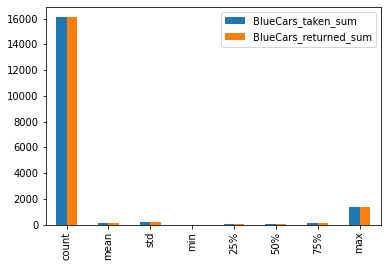

In [ ]:
df[['BlueCars_taken_sum','BlueCars_returned_sum']].describe().plot.bar()

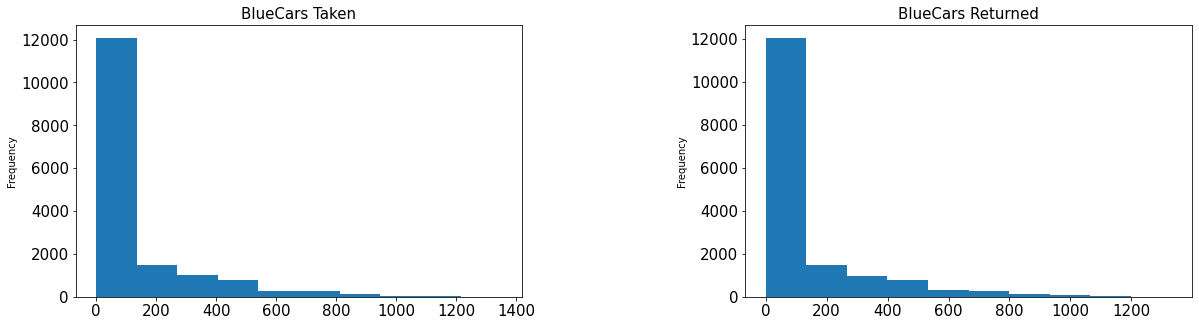

In [ ]:
fig, axarr = plt.subplots(1, 2, figsize=(20, 5))
df['BlueCars_taken_sum'].plot(kind='hist', ax=axarr[0], fontsize=15).set_title("BlueCars Taken", fontsize=15)
df['BlueCars_returned_sum'].plot( kind='hist',ax=axarr[1], fontsize=15 ).set_title("BlueCars Returned", fontsize=15) 
plt.subplots_adjust(wspace=.5)

In [ ]:
df[['BlueCars_taken_sum','BlueCars_returned_sum']].kurt()

BlueCars_taken_sum       6.172692
BlueCars_returned_sum    6.186288
dtype: float64

In [ ]:
df[['BlueCars_taken_sum','BlueCars_returned_sum']].describe().skew()

BlueCars_taken_sum       2.793824
BlueCars_returned_sum    2.794869
dtype: float64

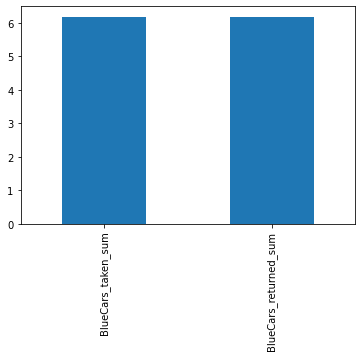

In [ ]:
df[['BlueCars_taken_sum','BlueCars_returned_sum']].kurt().plot.bar()

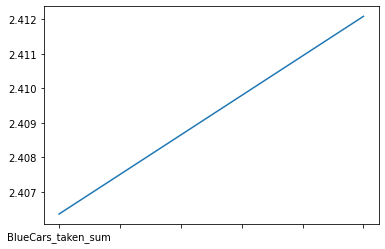

In [ ]:
df[['BlueCars_taken_sum','BlueCars_returned_sum']].skew().plot.line()

CHECKING AND REMOVING OUTLIERS IN OUR DATASET

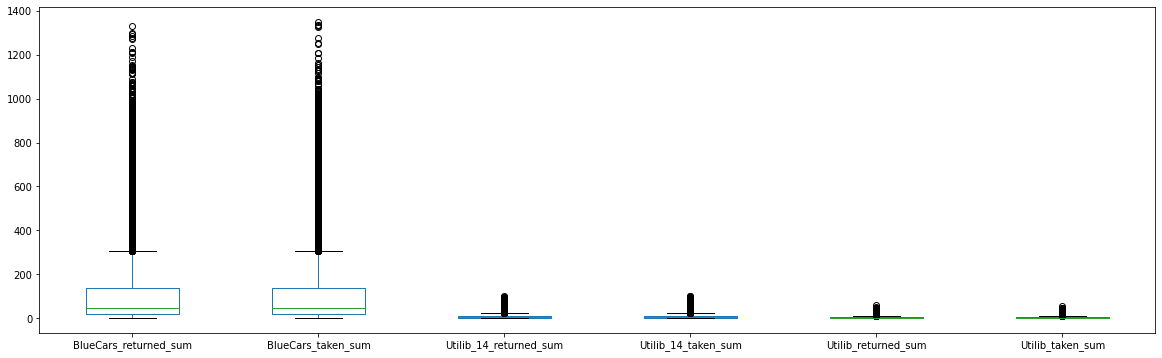

In [ ]:
df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']].plot(kind='box',figsize=(20,6))

In [ ]:
Q1 = df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']].quantile(0.25)
Q3 = df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']].quantile(0.75)
IQR = Q3 - Q1
IQR
((df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']]<(Q1 - 1.5*IQR))|(df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']]>(Q3 + 1.5 *IQR))).value_counts()
df = df[~((df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']]<(Q1 - 1.5*IQR))|(df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']]>(Q3 + 1.5 *IQR))).any(axis=1)]

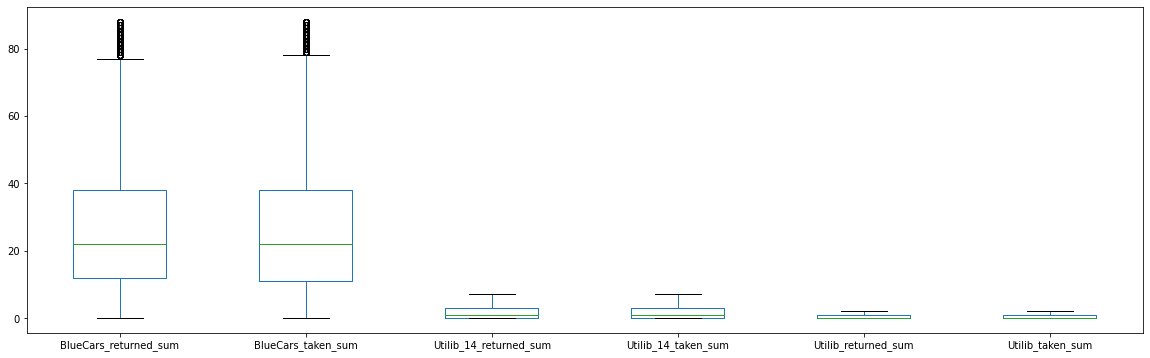

In [ ]:
df[['BlueCars_returned_sum','BlueCars_taken_sum','Utilib_14_returned_sum','Utilib_14_taken_sum','Utilib_returned_sum','Utilib_taken_sum']].plot(kind='box',figsize=(20,6))

Text(0.5, 1.0, 'Utilib_14 Returned')

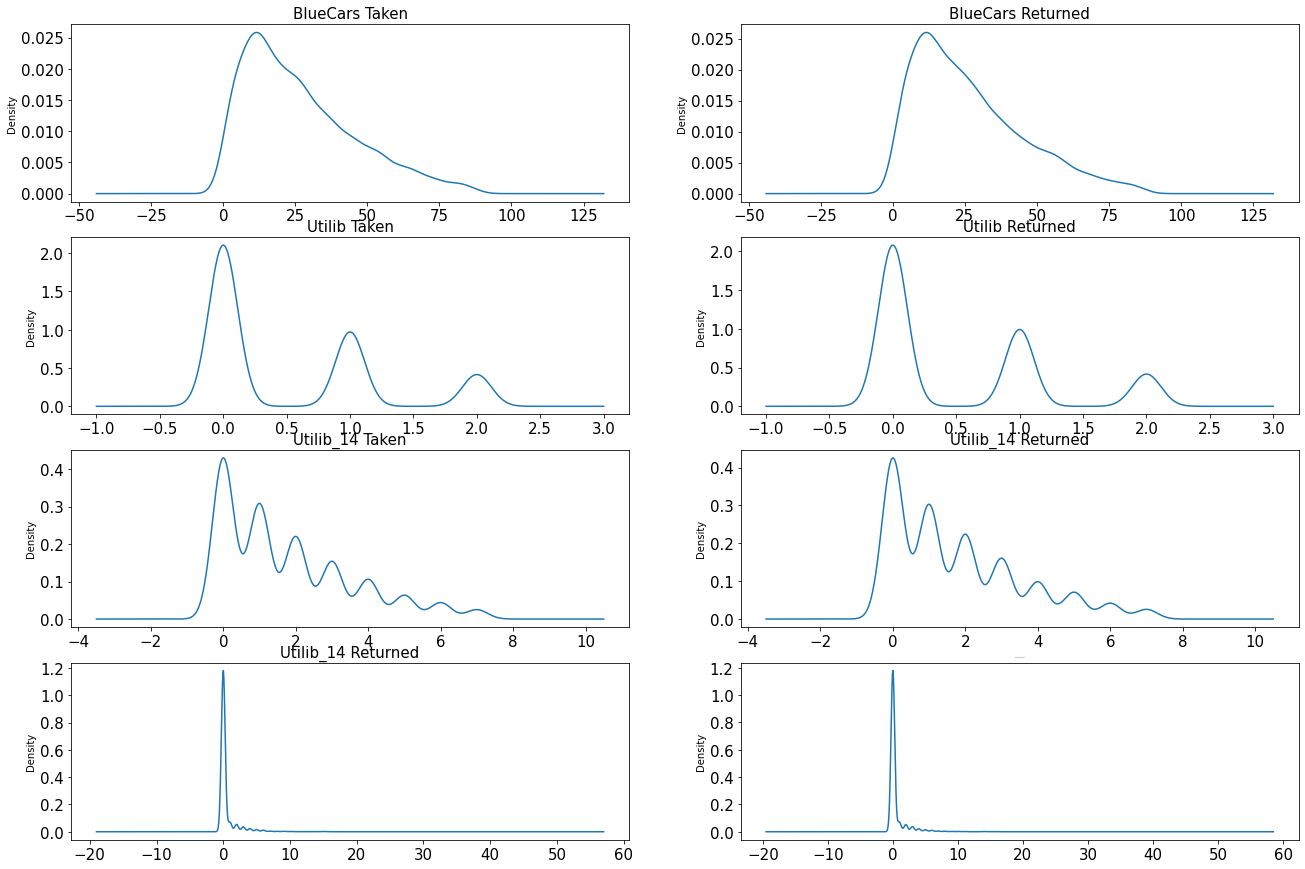

In [ ]:

fig, axarr = plt.subplots(4, 2, figsize=(22, 15))
df['BlueCars_taken_sum'].plot(kind='density', ax=axarr[0][0], fontsize=15).set_title("BlueCars Taken", fontsize=15)
df['BlueCars_returned_sum'].plot( kind='density',ax=axarr[0][1], fontsize=15 ).set_title("BlueCars Returned", fontsize=15) 
df['Utilib_taken_sum'].plot( kind='density',ax=axarr[1][0], fontsize=15 ).set_title("Utilib Taken", fontsize=15) 
df['Utilib_returned_sum'].plot( kind='density',ax=axarr[1][1], fontsize=15 ).set_title("Utilib Returned", fontsize=15) 
df['Utilib_14_taken_sum'].plot( kind='density',ax=axarr[2][0], fontsize=15 ).set_title("Utilib_14 Taken", fontsize=15) 
df['Utilib_14_returned_sum'].plot( kind='density',ax=axarr[2][1], fontsize=15 ).set_title("Utilib_14 Returned", fontsize=15) 
df['Slots_freed_sum'].plot( kind='density',ax=axarr[3][0], fontsize=15 ).set_title("Utilib_14 Returned", fontsize=15) 
df['Slots_taken_sum'].plot( kind='density',ax=axarr[3][1], fontsize=15 ).set_title("Utilib_14 Returned", fontsize=1)

In [ ]:
df.shape

(8497, 13)

After removing outliers,the dataset has shrunk to data that is without errors and can be easily analyzed ,thus producing better results.

BIVARIATE ANALYSIS


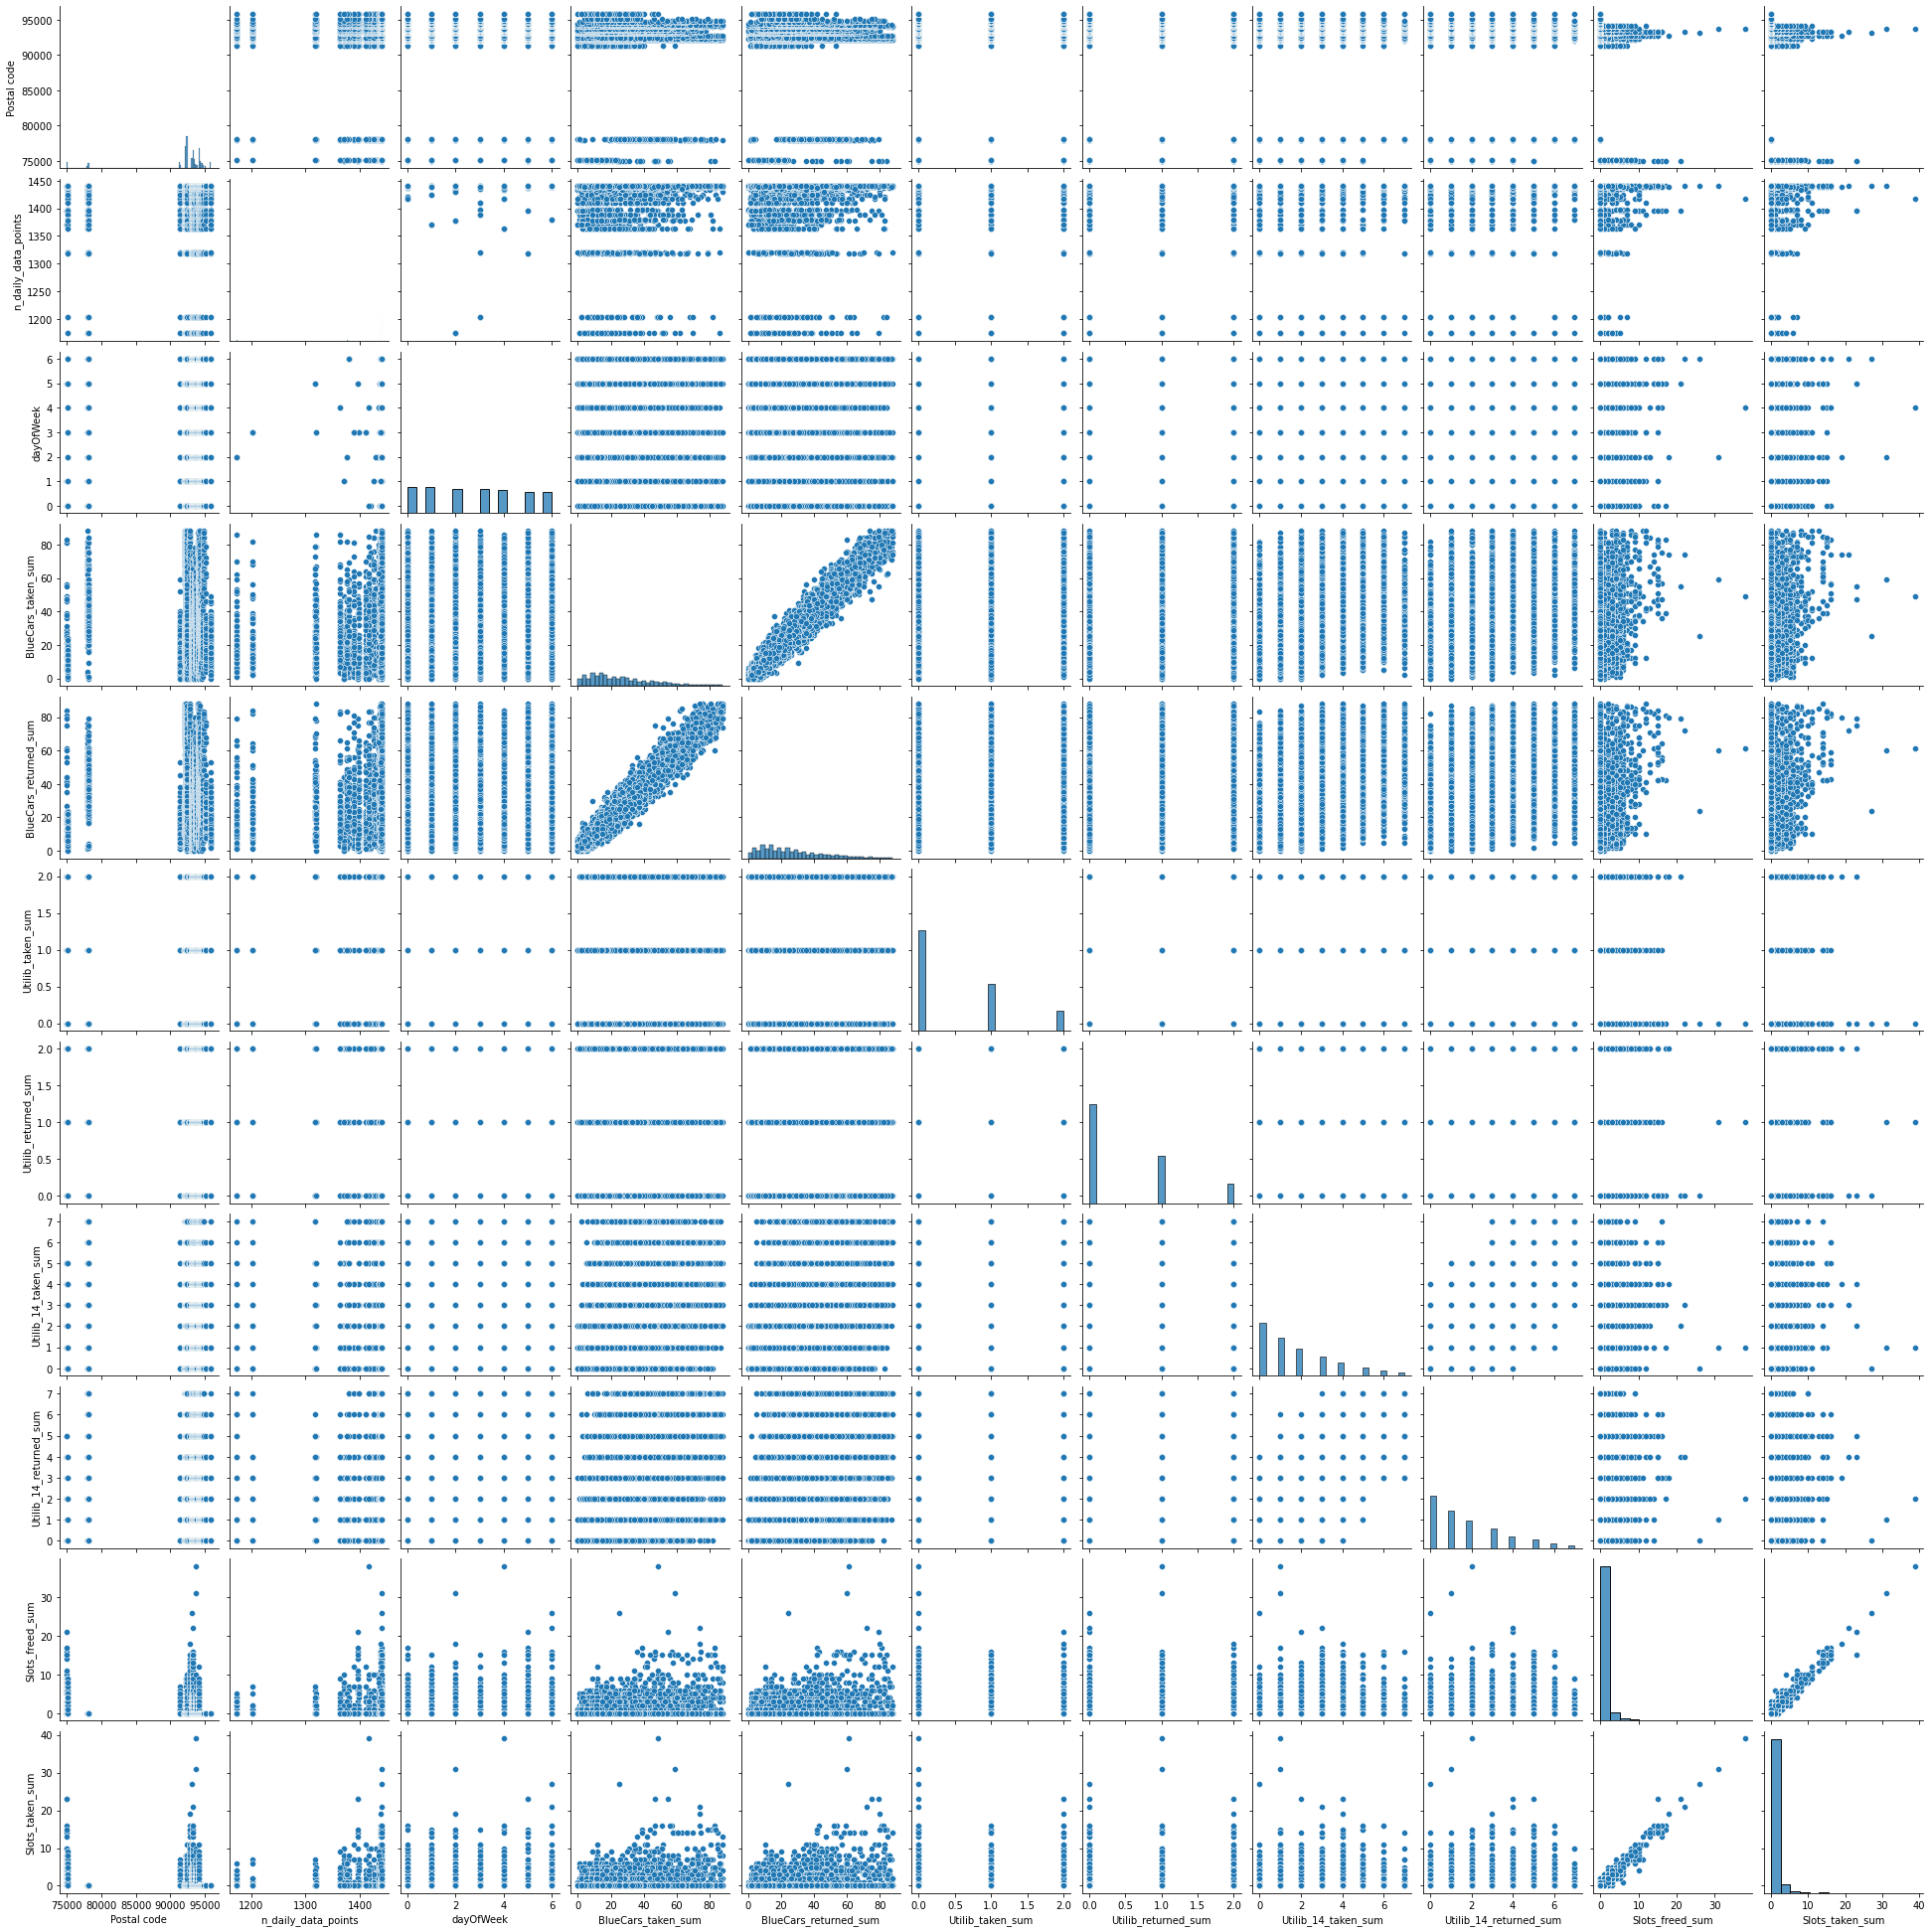

In [ ]:
sns.pairplot(df)
plt.show()

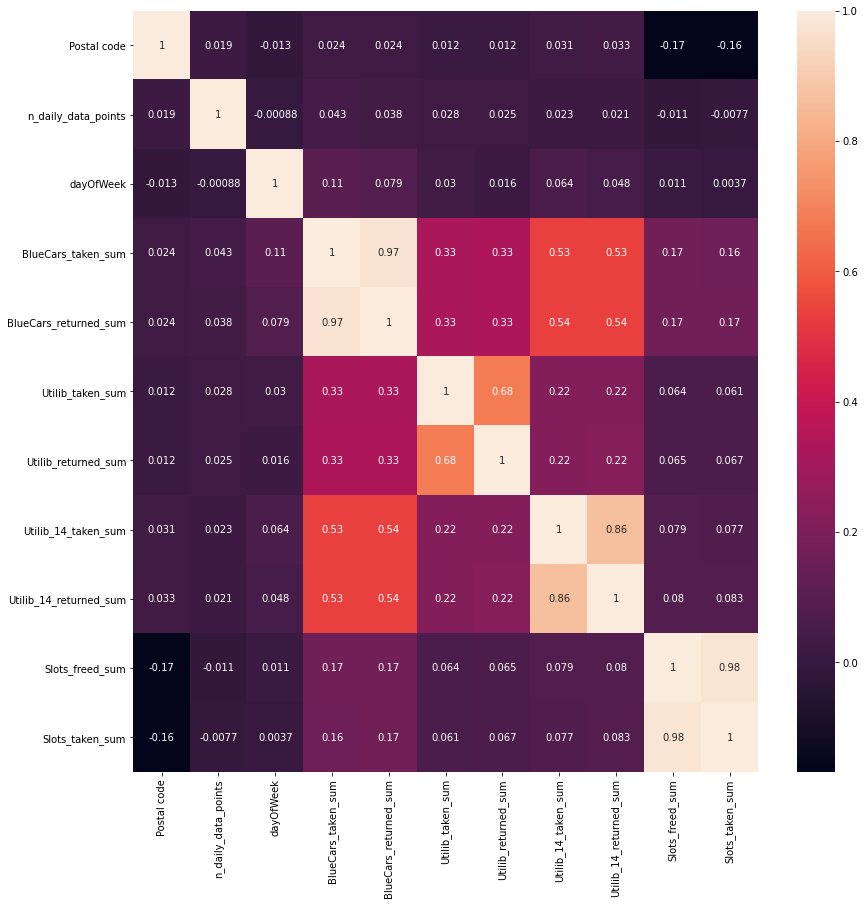

In [ ]:
plt.subplots(figsize=(14,14))
sns.heatmap(df.corr(),annot=True)
plt.show()


**HYPOTHESIS TESTING ON THE DATA**


Hypothesis testing is an act whereby an assumption is tested regarding a population parameter. The test tells the statistician or the data analyst or the data scientist whether or not his primary hypothesis is true.
The null hypothesis is the hypothesis the statistician believes to be true. The alternative hypothesis to be untrue, making it effectively the opposite of a null hypothesis.
Suppose we wanted to determine whether the number of bluecars_taken_sum  are the same bluecars_returned. A null hypothesis would be that the bluecars taken are the bluecars returned. The alternaive hypothesis would be the number of cars taken are not the number of cars returned.The test can be conducted over a weekday. Symbolically, these hypotheses would be expressed as;

Null Hypothesis -> Ho: u1 = u2

Alternated Hypothesis -> Ha: u1 != u2
If we accept our null hypothesis then the number of bluecars_taken in the weekday is the number of bluecars_returned in the weekend.
If we reject the null hypothesis the number of bluecars_taken is either less than or more than the number of cars returned on a particular day which should be a weekday.

In [ ]:
from scipy import stats
shapiro_test = stats.shapiro(df.BlueCars_taken_sum)
shapiro_test

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.92679363489151, 0.0)

In [ ]:
stats.anderson(df.BlueCars_taken_sum, dist='norm')

AndersonResult(statistic=176.02830076229475, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

After carrying out the Shapiro Wilk test for Normality we determined that

The P-value is < 0.05 we reject the null hypothesis and conclude that the the Data was not drawn from a Normal Distribution at alpha=0.05 level of significance.

In [ ]:
#selecting the period of tine we want to use to test the hypothesis that has to be a weekday
df2=df[['BlueCars_taken_sum']][df['date']=='1/29/2018' ]

df3=df[['BlueCars_returned_sum']][df['date']=='1/29/2018']

**NORMALIZE THE DATA**

We carried out both the Shapiro Wilk and Anderson-Darling tests above and concluded that the data is not from a normally distributed Population.

Therefore we attempt to normalize the data using the BoxCox transformation in order for us to carry out T-test

In [ ]:

from scipy.special import boxcox1p
df2.BlueCars_taken_sum = boxcox1p(df2.BlueCars_taken_sum,0.25)

In [ ]:
from scipy import stats
shapiro_test = stats.shapiro(df2.BlueCars_taken_sum)
shapiro_test

(0.9829328656196594, 0.5530110001564026)

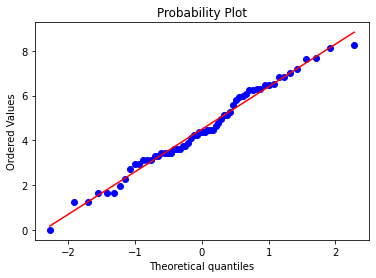

In [ ]:
from scipy.stats import probplot
import matplotlib.pyplot as plt
probplot(df2.BlueCars_taken_sum, plot = plt)
plt.show()

In [ ]:

from scipy.special import boxcox1p
df3.BlueCars_returned_sum = boxcox1p(df3.BlueCars_returned_sum,0.25)

In [ ]:
from scipy import stats
shapiro_test = stats.shapiro(df3.BlueCars_returned_sum)
shapiro_test

(0.9861477017402649, 0.7202420830726624)

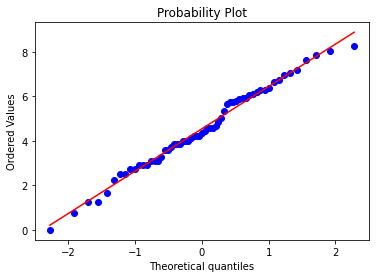

In [ ]:

from scipy.stats import probplot
import matplotlib.pyplot as plt
probplot(df3.BlueCars_returned_sum, plot = plt)
plt.show()

TWO SAMPLE T-TEST

In [ ]:
a= np.array(df2)
b = np.array(df3)

In [ ]:
df2.describe()

,BlueCars_taken_sum
count,61.000000
mean,4.500302
std,1.868519
min,0.000000
25%,3.284641
50%,4.351191
75%,6.059467
max,8.251257


In [ ]:
df3.describe()

,BlueCars_returned_sum
count,61.000000
mean,4.543074
std,1.867724
min,0.000000
25%,3.113118
50%,4.351191
75%,5.931295
max,8.251257


In [ ]:
from scipy.stats import norm
import scipy.stats
TestStat = scipy.stats.ttest_ind(a, b, axis=0, equal_var=True)
TestStat

Ttest_indResult(statistic=array([-0.12644688]), pvalue=array([0.89958981]))

Carrying out the Test we establish that:

T-Statistic = -0.35 and the P-Value is 0.72

Therefore since the calculated statistic(-0.35) is less than our tabulated value(1.98) we Fail to reject the Null Hypothesis and conclude that there are an equal number of Blue cars being taken and returned to Stations on a given day at alpha = 0.05 level of significance.

POWER OF TEST

In [ ]:
#!pip install statsmodels
from statsmodels.stats.power import tt_ind_solve_power
statsmodels.stats.power.tt_ind_solve_power(effect_size=0.75, nobs1=60, alpha=0.05, power=None, ratio=1, alternative='two-sided')

0.9827552322903581

**CONCLUSION**

Upon conducting the hypothesis testing,we have determined that the mean number of BlueCars within the Station either being returned or rented out have approximately the same mean at alpha 0.05 level of significance.
The power of the test here was estimated to be 0.98 at alpha 0.05 level of significence. Therefore the probability of rejecting the null hypothesis when it is indeed false i.e the probability of avoiding a type 2 error is given as 0.98 or 98%